# Alpha diversity

## Setup

In [86]:
#Libraries
library("phyloseq")
library("microbiome")
library("tidyverse")
library("IRdisplay")
library("ggpubr")
#Load processed but unrarefied data from main R community workshop
load("/pub14/tea/nsc206/NEOF/R_community/data/phyloseq.RData")

In [87]:
#Rarefaction values
#Rarefaction size
#Minimum sample depth in this case
rarefaction_size <- min(microbiome::readcount(pseq))
#Load the vector of 10 rngseeds created in the previous chapter
load("alpha_10_rngseeds.RData")
#Number of rarefaction iterations to be carried out
#Based on length of rng seed vector
rarefaction_iters <- length(rngseed_vec)

## Iterative rarefaction loop

In [88]:
#Loop to create iteration based rarefied alpha diversity values

#First create a dataframe to contain the final summed alpha diveristy values
#In this case we'll run the first rarefied alpha diversity analysis
pseq_rarefy <- phyloseq::rarefy_even_depth(
    pseq,
    sample.size = rarefaction_size,
    rngseed = rngseed_vec[1],
    verbose = FALSE)
#Alpha diversity
alpha_df_sum <- microbiome::alpha(pseq_rarefy, index= "all")

#Loop through 2 to the number of rarefaction
for (i in 2:rarefaction_iters){
    pseq_rarefy <- phyloseq::rarefy_even_depth(
        pseq,
        sample.size = rarefaction_size,
        rngseed = rngseed_vec[i], 
        verbose = FALSE)
    #alpha diversity
    alpha_df <- microbiome::alpha(pseq_rarefy, index= "all")
    #Add the new dataframe values to sum dataframe
    alpha_df_sum <- alpha_df_sum + alpha_df
}
#Divide by number of rarefaction iterations to get average
alpha_df_mean <- alpha_df_sum / rarefaction_iters
#Save alpha mean dataframe
save(alpha_df_mean, file = "alpha_df_mean.RData")
#Remove unneeded objects
rm(pseq, alpha_df_sum, alpha_df)

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity

Observed richness

Other forms of richness

Diversity

Evenness

Dominance

Rarity



In [89]:
#See head of data frame
head(alpha_df_mean)

,observed,chao1,diversity_inverse_simpson,diversity_gini_simpson,diversity_shannon,diversity_fisher,diversity_coverage,evenness_camargo,evenness_pielou,evenness_simpson,⋯,dominance_dbp,dominance_dmn,dominance_absolute,dominance_relative,dominance_simpson,dominance_core_abundance,dominance_gini,rarity_log_modulo_skewness,rarity_low_abundance,rarity_rare_abundance
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LD_CVP_rep1,73.0,73.0000,8.761088,0.8858060,3.122611,10.58904,4.0,1.0000000,0.7278033,0.1200149,⋯,0.3014377,0.3883638,3144.9,0.3014377,0.11419405,0.729924279,0.9910843,2.021464,0.01473210,0.1036710
LD_CVP_rep2,77.0,77.0000,8.191873,0.8778947,2.945496,11.27123,3.0,1.0000000,0.6780910,0.1063880,⋯,0.2808780,0.4424902,2930.4,0.2808780,0.12210526,0.648739576,0.9924756,2.045537,0.02540976,0.1032397
LD_CVP_rep3,73.0,73.0000,9.074151,0.8897148,3.156398,10.58904,4.9,1.0000000,0.7356784,0.1243034,⋯,0.2940477,0.4062494,3067.8,0.2940477,0.11028518,0.687683313,0.9909057,2.011856,0.01775137,0.1321863
LD_ENV_rep1,132.9,133.8524,17.164610,0.9417268,3.619624,21.47796,7.0,0.9839997,0.7402730,0.1291579,⋯,0.1640276,0.2801016,1711.3,0.1640276,0.05827317,0.001859484,0.9867927,2.049685,0.06285824,0.5828046
LD_ENV_rep2,165.3,167.8571,17.279734,0.9421217,3.698019,27.88862,7.8,0.9798331,0.7240050,0.1045416,⋯,0.1639701,0.2835522,1710.7,0.1639701,0.05787833,0.002290808,0.9851461,2.054606,0.07960318,0.5783667
LD_ENV_rep3,177.3,180.2323,15.777676,0.9365897,3.654954,30.34442,6.7,0.9800040,0.7058952,0.0889980,⋯,0.1790377,0.2994345,1867.9,0.1790377,0.06341026,0.001964919,0.9851235,2.056423,0.08515288,0.5648519


## Data frame tidying

In [90]:
#Rename
#Rename shannon_diveristy column
#dplyr::rename(df, new_name=old_name)
alpha_df_mean  <- 
    dplyr::rename(alpha_df_mean,
                  shannon=diversity_shannon)

In [91]:
#Code for Task on 17.1
alpha_df_mean  <- 
    dplyr::rename(alpha_df_mean,
                  invsimpson=diversity_inverse_simpson,
                  pielou=evenness_pielou,
                  fisher=diversity_fisher)

In [92]:
colnames(alpha_df_mean)

[1] "observed"                   "chao1"                     
 [3] "invsimpson"                 "diversity_gini_simpson"    
 [5] "shannon"                    "fisher"                    
 [7] "diversity_coverage"         "evenness_camargo"          
 [9] "pielou"                     "evenness_simpson"          
[11] "evenness_evar"              "evenness_bulla"            
[13] "dominance_dbp"              "dominance_dmn"             
[15] "dominance_absolute"         "dominance_relative"        
[17] "dominance_simpson"          "dominance_core_abundance"  
[19] "dominance_gini"             "rarity_log_modulo_skewness"
[21] "rarity_low_abundance"       "rarity_rare_abundance"

In [93]:
#Combine metadata and alpha diveristy mean values into one dataframe
#Extract metadata from rarefied phyloseq object
metadf <- phyloseq::sample_data(pseq_rarefy)
#Ensure row names are identical
#if not sort alpha data frame rows by meta row names
if (identical(row.names(metadf), row.names(alpha_df_mean)) == FALSE) {
    alpha_df_mean <- alpha_df_mean[row.names(metadf),]
}
#Combined
meta_alpha_mean_df <- cbind(metadf,alpha_df_mean)
head(meta_alpha_mean_df)
#Remove rarefied phyloseq object that we do not need any more in this notebook
rm(pseq_rarefy)

,sample.name,site,media,replicate,site.media,observed,chao1,invsimpson,diversity_gini_simpson,shannon,⋯,dominance_dbp,dominance_dmn,dominance_absolute,dominance_relative,dominance_simpson,dominance_core_abundance,dominance_gini,rarity_log_modulo_skewness,rarity_low_abundance,rarity_rare_abundance
,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
LD_CVP_rep1,LD_CVP_rep1,LD,CVP,rep1,LD_CVP,73.0,73.0000,8.761088,0.8858060,3.122611,⋯,0.3014377,0.3883638,3144.9,0.3014377,0.11419405,0.729924279,0.9910843,2.021464,0.01473210,0.1036710
LD_CVP_rep2,LD_CVP_rep2,LD,CVP,rep2,LD_CVP,77.0,77.0000,8.191873,0.8778947,2.945496,⋯,0.2808780,0.4424902,2930.4,0.2808780,0.12210526,0.648739576,0.9924756,2.045537,0.02540976,0.1032397
LD_CVP_rep3,LD_CVP_rep3,LD,CVP,rep3,LD_CVP,73.0,73.0000,9.074151,0.8897148,3.156398,⋯,0.2940477,0.4062494,3067.8,0.2940477,0.11028518,0.687683313,0.9909057,2.011856,0.01775137,0.1321863
LD_ENV_rep1,LD_ENV_rep1,LD,ENV,rep1,LD_ENV,132.9,133.8524,17.164610,0.9417268,3.619624,⋯,0.1640276,0.2801016,1711.3,0.1640276,0.05827317,0.001859484,0.9867927,2.049685,0.06285824,0.5828046
LD_ENV_rep2,LD_ENV_rep2,LD,ENV,rep2,LD_ENV,165.3,167.8571,17.279734,0.9421217,3.698019,⋯,0.1639701,0.2835522,1710.7,0.1639701,0.05787833,0.002290808,0.9851461,2.054606,0.07960318,0.5783667
LD_ENV_rep3,LD_ENV_rep3,LD,ENV,rep3,LD_ENV,177.3,180.2323,15.777676,0.9365897,3.654954,⋯,0.1790377,0.2994345,1867.9,0.1790377,0.06341026,0.001964919,0.9851235,2.056423,0.08515288,0.5648519


In [94]:
#Create long version for plotting
#alpha_df_mean (no metadata) column names to be used for long conversion
alpha_div_colnames <- colnames(alpha_df_mean)
#wide to long
meta_alpha_mean_long_df <- 
tidyr::pivot_longer(data = meta_alpha_mean_df,
                    #Change the alpha diversity names to long format
                    #I.e keep our metadata columns as separate columns
                    #all_of() used to silence wanring message
                    cols = all_of(alpha_div_colnames),
                    #Set metric names to column called metric
                    #Set values to column called value
                    names_to = "metric", values_to = "value")
#Change our metric column to a factor
#Useful for plotting
meta_alpha_mean_long_df$metric <- as.factor(meta_alpha_mean_long_df$metric)
#Check head and dimensions of long data frame
head(meta_alpha_mean_long_df)
dim(meta_alpha_mean_long_df)
#Remove unneeded objects
rm(alpha_df_mean, metadf)

sample.name,site,media,replicate,site.media,metric,value
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,observed,73.000000
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,chao1,73.000000
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,invsimpson,8.761088
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,diversity_gini_simpson,0.885806
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,shannon,3.122611
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,fisher,10.589038


[1] 792   7

In [95]:
unique(meta_alpha_mean_long_df$metric)

[1] observed                   chao1                     
 [3] invsimpson                 diversity_gini_simpson    
 [5] shannon                    fisher                    
 [7] diversity_coverage         evenness_camargo          
 [9] pielou                     evenness_simpson          
[11] evenness_evar              evenness_bulla            
[13] dominance_dbp              dominance_dmn             
[15] dominance_absolute         dominance_relative        
[17] dominance_simpson          dominance_core_abundance  
[19] dominance_gini             rarity_log_modulo_skewness
[21] rarity_low_abundance       rarity_rare_abundance     
22 Levels: chao1 diversity_coverage ... shannon

In [96]:
#Process our long data frame
#Subset our long alpha diversity table to only contain our metrics of choice
metrics <- c("observed","diversity_shannon")
basic_alpha_metrics_long_df <- meta_alpha_mean_long_df[
    meta_alpha_mean_long_df$metric %in% metrics,
]
#Check head of subsetted long data frame
head(basic_alpha_metrics_long_df)

sample.name,site,media,replicate,site.media,metric,value
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,observed,73.0
LD_CVP_rep2,LD,CVP,rep2,LD_CVP,observed,77.0
LD_CVP_rep3,LD,CVP,rep3,LD_CVP,observed,73.0
LD_ENV_rep1,LD,ENV,rep1,LD_ENV,observed,132.9
LD_ENV_rep2,LD,ENV,rep2,LD_ENV,observed,165.3
LD_ENV_rep3,LD,ENV,rep3,LD_ENV,observed,177.3


## Plot

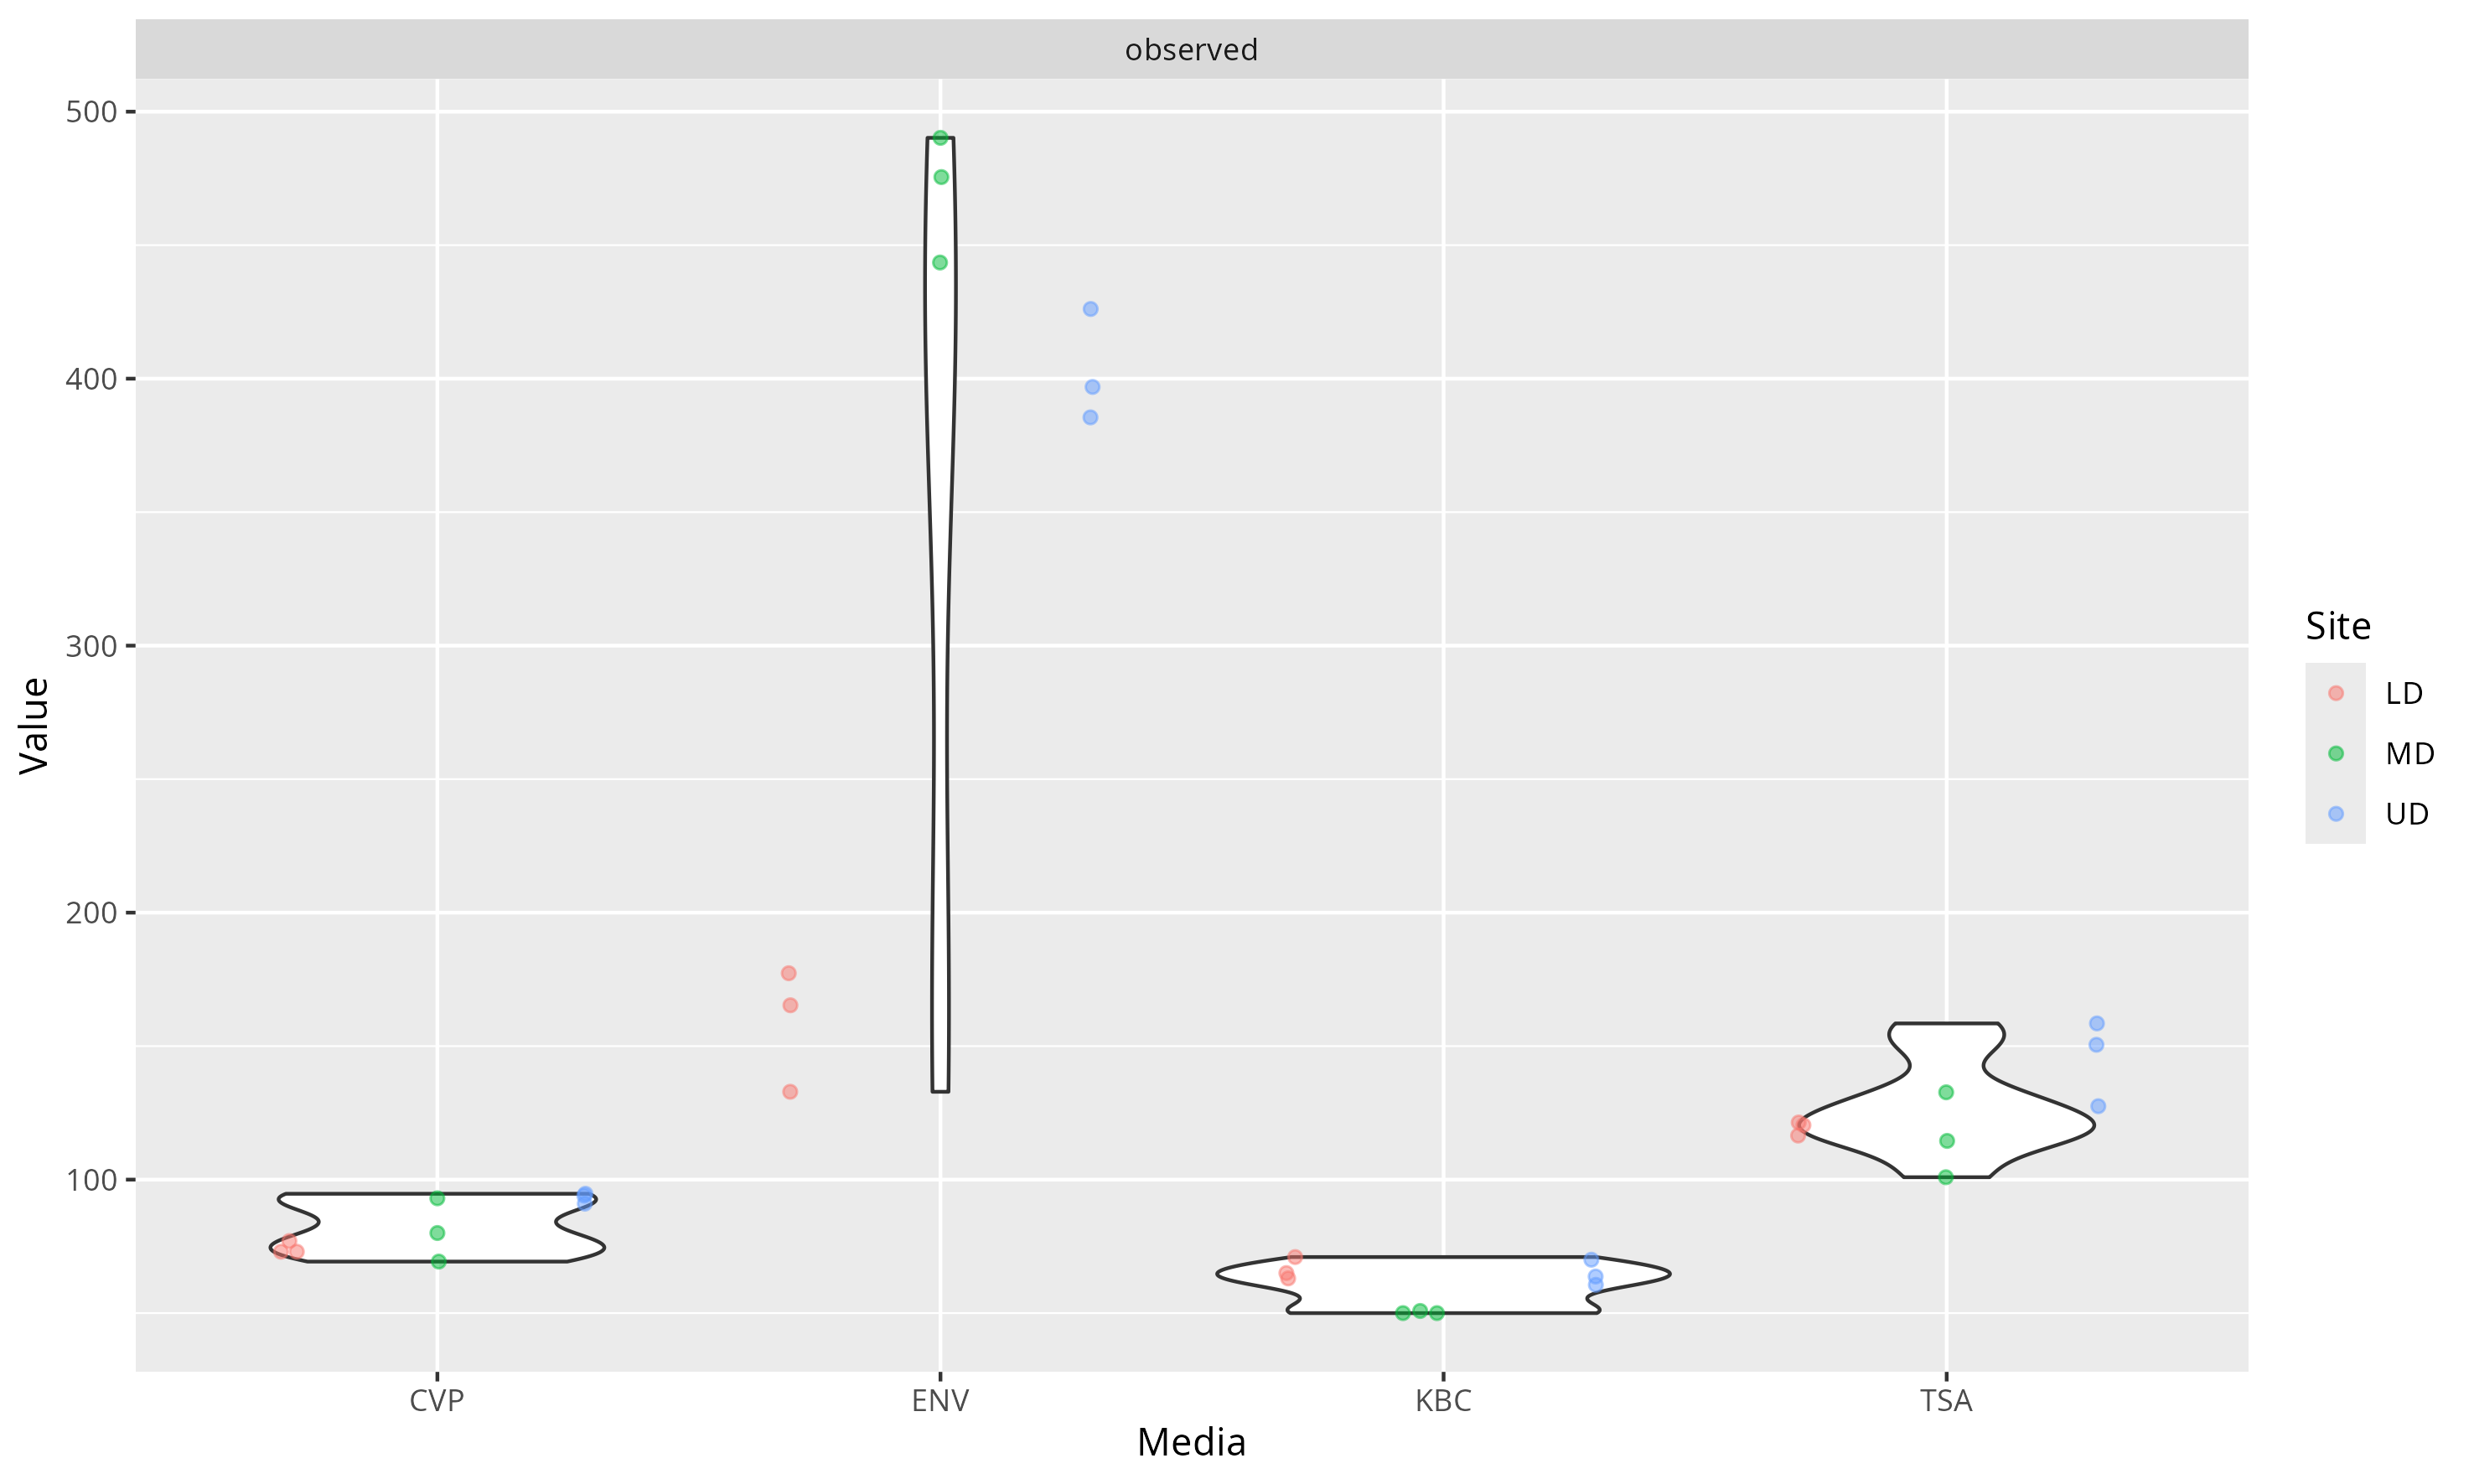

In [97]:
#Produce ggplot object of violin plot
alpha_violinplot <- ggplot(basic_alpha_metrics_long_df, aes(x = media, y = value)) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5, aes(colour=site)) +
                            ggplot2::labs(colour = "Site", x = "Media", y = "Value") +
                            ggplot2::facet_wrap(~metric, scales = "free")
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_rarefy_iters_media_violinplot.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_rarefy_iters_media_violinplot.png")

## Alpha stats

In [98]:
#Kruskal Wallis test
#observed
kruskal.test(observed ~ media, data = meta_alpha_mean_df)
#shannon
kruskal.test(shannon ~ media, data = meta_alpha_mean_df)


	Kruskal-Wallis rank sum test

data:  observed by media
Kruskal-Wallis chi-squared = 32.213, df = 3, p-value = 4.718e-07



	Kruskal-Wallis rank sum test

data:  shannon by media
Kruskal-Wallis chi-squared = 18.804, df = 3, p-value = 0.0003002


In [100]:
#Paired wilcox test
#observed
pairwise.wilcox.test(meta_alpha_mean_df$observed, meta_alpha_mean_df$media, p.adjust.method = "holm")
#Shannon
pairwise.wilcox.test(meta_alpha_mean_df$shannon, meta_alpha_mean_df$media, p.adjust.method = "holm")

Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(xi, xj, paired = paired, ...):
“cannot compute exact p-value with ties”



	Pairwise comparisons using Wilcoxon rank sum test with continuity correction 

data:  meta_alpha_mean_df$observed and meta_alpha_mean_df$media 

    CVP     ENV     KBC    
ENV 0.00205 -       -      
KBC 0.00205 0.00205 -      
TSA 0.00205 0.00099 0.00205

P value adjustment method: holm 


	Pairwise comparisons using Wilcoxon rank sum exact test 

data:  meta_alpha_mean_df$shannon and meta_alpha_mean_df$media 

    CVP     ENV     KBC    
ENV 0.04245 -       -      
KBC 0.38050 0.00025 -      
TSA 0.48943 0.07330 0.00082

P value adjustment method: holm 

## Plot with statistics

In [101]:
#To compare means we need to create a list of comparisons
#Create character vector of unique metadata values (media in this case)
uniq_media_values_chr_vec <- unique(as.character(basic_alpha_metrics_long_df$media))
uniq_media_values_chr_vec
#can use combn to get comparisons
my_comparisons <- combn(uniq_media_values_chr_vec, m =2, simplify=FALSE)
#Check contents and structure
my_comparisons
str(my_comparisons)

[1] "CVP" "ENV" "KBC" "TSA"

[[1]]
[1] "CVP" "ENV"

[[2]]
[1] "CVP" "KBC"

[[3]]
[1] "CVP" "TSA"

[[4]]
[1] "ENV" "KBC"

[[5]]
[1] "ENV" "TSA"

[[6]]
[1] "KBC" "TSA"

List of 6
 $ : chr [1:2] "CVP" "ENV"
 $ : chr [1:2] "CVP" "KBC"
 $ : chr [1:2] "CVP" "TSA"
 $ : chr [1:2] "ENV" "KBC"
 $ : chr [1:2] "ENV" "TSA"
 $ : chr [1:2] "KBC" "TSA"


Warning message in wilcox.test.default(c(73, 77, 73, 80, 93, 69.3, 91, 94.7, 94), :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(73, 77, 73, 80, 93, 69.3, 91, 94.7, 94), :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(73, 77, 73, 80, 93, 69.3, 91, 94.7, 94), :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(132.9, 165.3, 177.3, 443.5, 490.2, 475.5, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(63, 71, 65, 50, 50.8, 50, 60.6, 63.7, 70:
“cannot compute exact p-value with ties”


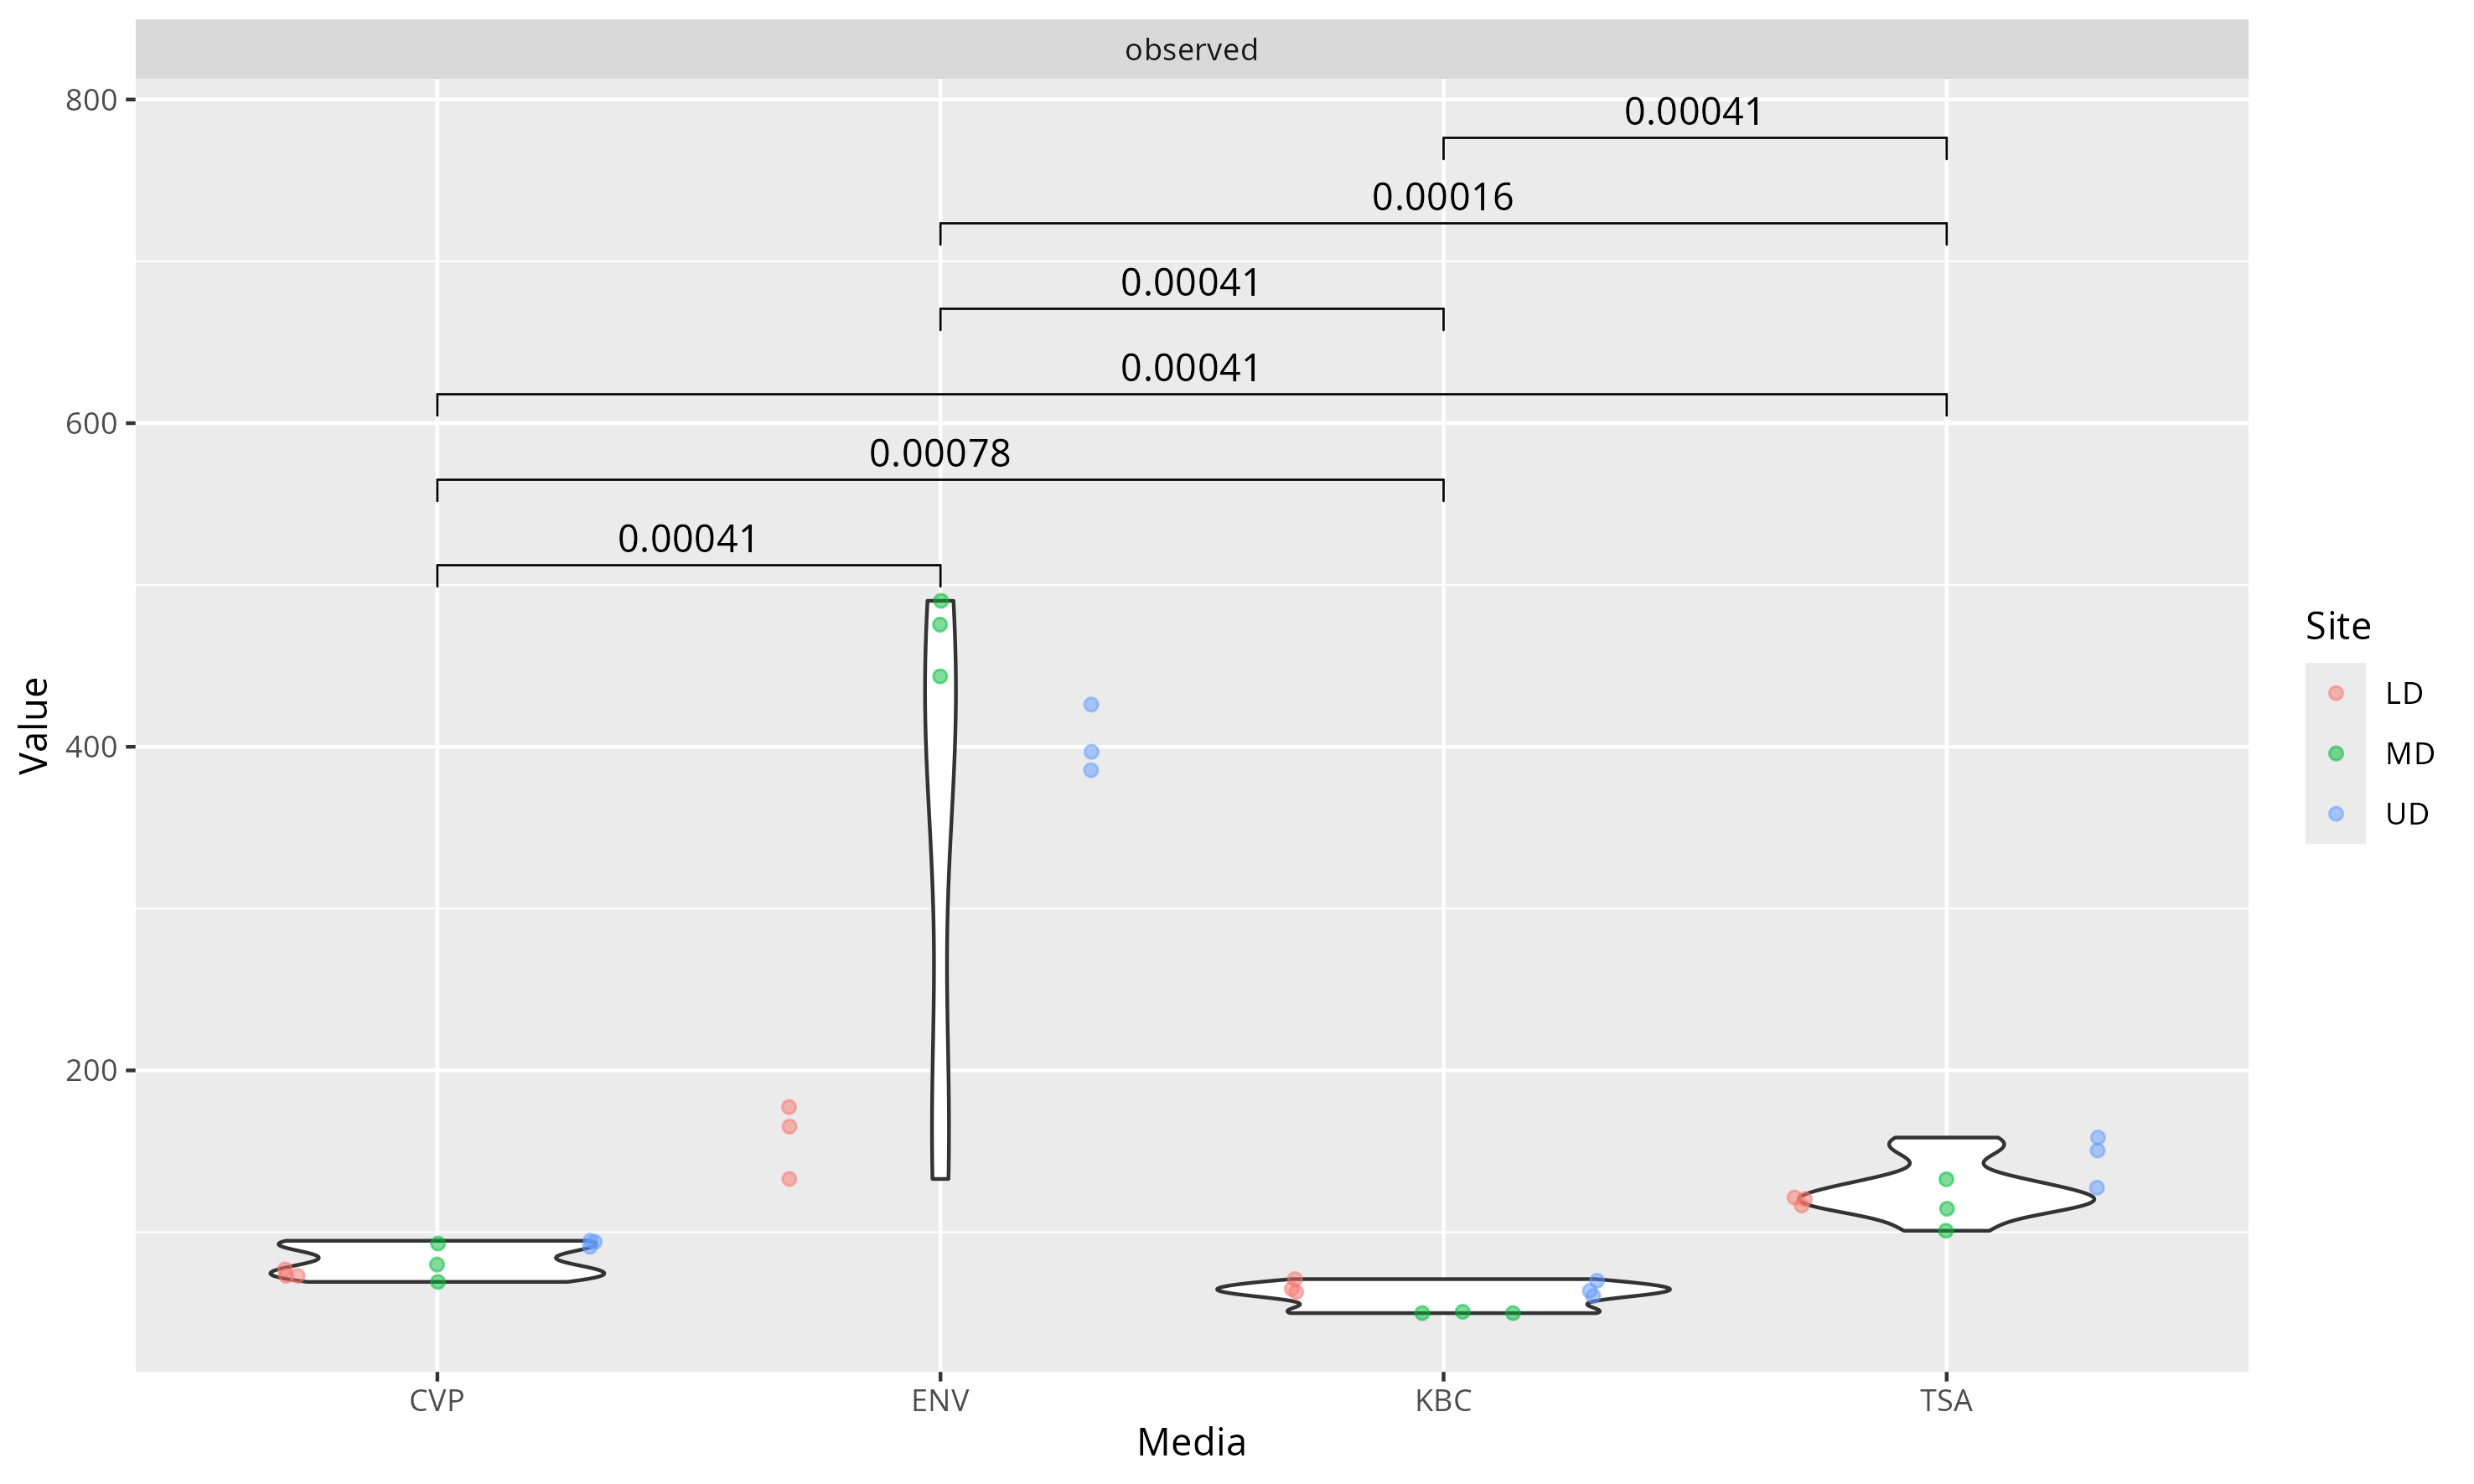

In [102]:
#Produce ggplot object of violin plot
alpha_violinplot <- ggplot(basic_alpha_metrics_long_df, aes(x = media, y = value)) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5, aes(colour=site)) +
                            ggplot2::labs(colour = "Site", x = "Media", y = "Value") +
                            ggplot2::facet_wrap(~metric, scales = "free") +
                            #Add comparisons
                            ggpubr::stat_compare_means(comparisons = my_comparisons, method = "wilcox")
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_rarefy_iters_media_violinplot_pairwise_wilcox.png", 
       plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_rarefy_iters_media_violinplot_pairwise_wilcox.png")

In [103]:
#Set order of media
basic_alpha_metrics_long_df$media <- factor(basic_alpha_metrics_long_df$media,
                                            #Set order of levels
                                            levels = c("ENV", "CVP", "KBC", "TSA"))

In [104]:
#Order comparisons
my_ordered_comparisons <- my_comparisons[c(1,2,6,4,3,5)]
my_ordered_comparisons

[[1]]
[1] "CVP" "ENV"

[[2]]
[1] "CVP" "KBC"

[[3]]
[1] "KBC" "TSA"

[[4]]
[1] "ENV" "KBC"

[[5]]
[1] "CVP" "TSA"

[[6]]
[1] "ENV" "TSA"

Warning message in wilcox.test.default(c(132.9, 165.3, 177.3, 443.5, 490.2, 475.5, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(73, 77, 73, 80, 93, 69.3, 91, 94.7, 94), :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(73, 77, 73, 80, 93, 69.3, 91, 94.7, 94), :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(73, 77, 73, 80, 93, 69.3, 91, 94.7, 94), :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(63, 71, 65, 50, 50.8, 50, 60.6, 63.7, 70:
“cannot compute exact p-value with ties”


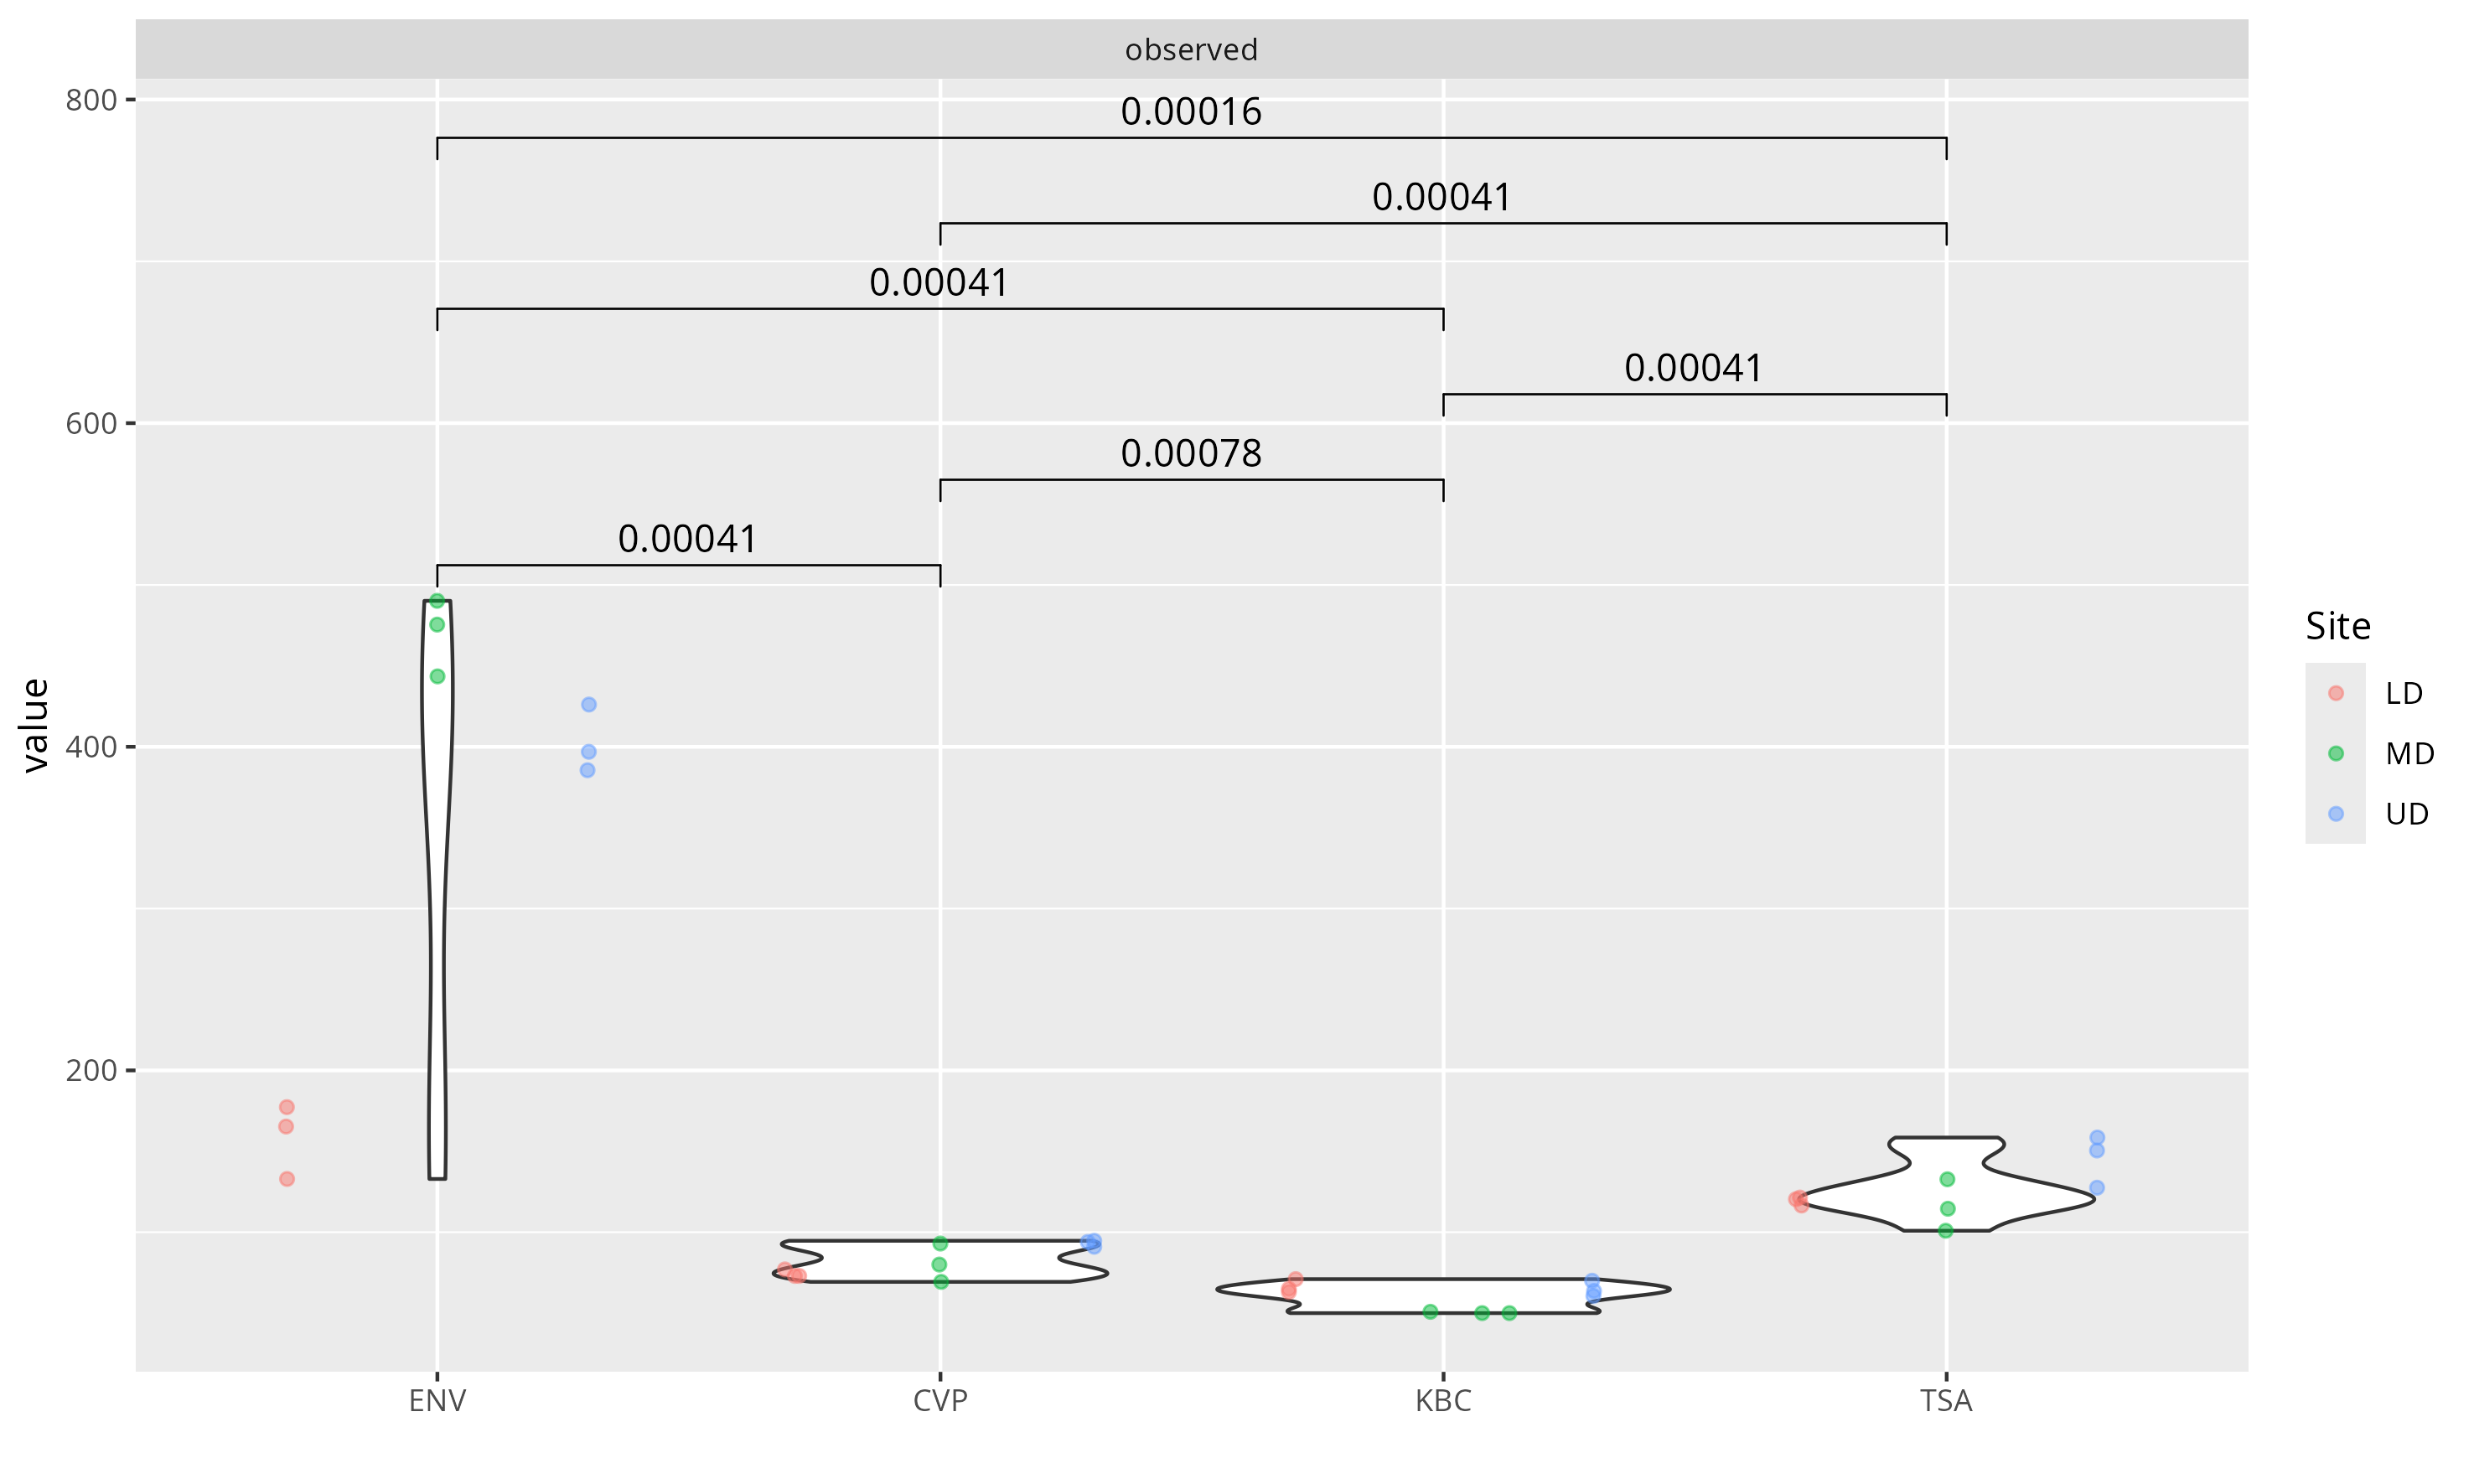

In [105]:
#Produce ggplot object of violin plot
alpha_violinplot <- ggplot(basic_alpha_metrics_long_df, aes(x = media, y = value)) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5, aes(colour=site)) +
                            ggplot2::labs(colour = "Site", x = "") +
                            ggplot2::facet_wrap(~metric, scales = "free") +
                            #Add pairwise wilcxon test
                            ggpubr::stat_compare_means(comparisons = my_ordered_comparisons, method = "wilcox")
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_rarefy_iters_media_violinplot_pairwise_wilcox.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 150, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_rarefy_iters_media_violinplot_pairwise_wilcox.png")

## Practice

In [108]:
#Process our long data frame
#Subset our long alpha diversity data frame to only contain our metrics of choice
metrics <- c("invsimpson","pielou","fisher")
subset_alpha_metrics_long_df <- meta_alpha_mean_long_df[
    meta_alpha_mean_long_df$metric %in% metrics,
]
#Check head of subsetted long data frame
head(subset_alpha_metrics_long_df)

sample.name,site,media,replicate,site.media,metric,value
<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,invsimpson,8.7610882
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,fisher,10.5890378
LD_CVP_rep1,LD,CVP,rep1,LD_CVP,pielou,0.7278033
LD_CVP_rep2,LD,CVP,rep2,LD_CVP,invsimpson,8.1918729
LD_CVP_rep2,LD,CVP,rep2,LD_CVP,fisher,11.2712286
LD_CVP_rep2,LD,CVP,rep2,LD_CVP,pielou,0.6780910


In [109]:
#To compare means we need to create a list of comparisons
#Create character vector of unique metadata values (site in this case)
uniq_site_values_chr_vec <- unique(as.character(subset_alpha_metrics_long_df$site))
uniq_site_values_chr_vec
#can use combn to get comparisons
my_comparisons <- combn(uniq_site_values_chr_vec, m =2, simplify=FALSE)
#Check contents and structure
my_comparisons
str(my_comparisons)

[1] "LD" "MD" "UD"

[[1]]
[1] "LD" "MD"

[[2]]
[1] "LD" "UD"

[[3]]
[1] "MD" "UD"

List of 3
 $ : chr [1:2] "LD" "MD"
 $ : chr [1:2] "LD" "UD"
 $ : chr [1:2] "MD" "UD"


In [110]:
#Reorder sites, media and comparisons
#Set order of sites
subset_alpha_metrics_long_df$site <- factor(subset_alpha_metrics_long_df$site,
                                           #set order of levels
                                           levels = c("UD", "MD", "LD"))
#Set order of media
subset_alpha_metrics_long_df$media <- factor(subset_alpha_metrics_long_df$media,
                                            #set order of levels
                                            levels = c("ENV","CVP","KBC","TSA"))
#Order comparisons
my_ordered_comparisons <- my_comparisons[c(3,1,2)]
my_ordered_comparisons

[[1]]
[1] "MD" "UD"

[[2]]
[1] "LD" "MD"

[[3]]
[1] "LD" "UD"

Warning message in wilcox.test.default(c(11.7875688894332, 14.0694424800212, 9.96465868752382, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(10.5890378384333, 11.2712286024777, 10.5890378384333, :
“cannot compute exact p-value with ties”
Warning message in wilcox.test.default(c(10.5890378384333, 11.2712286024777, 10.5890378384333, :
“cannot compute exact p-value with ties”


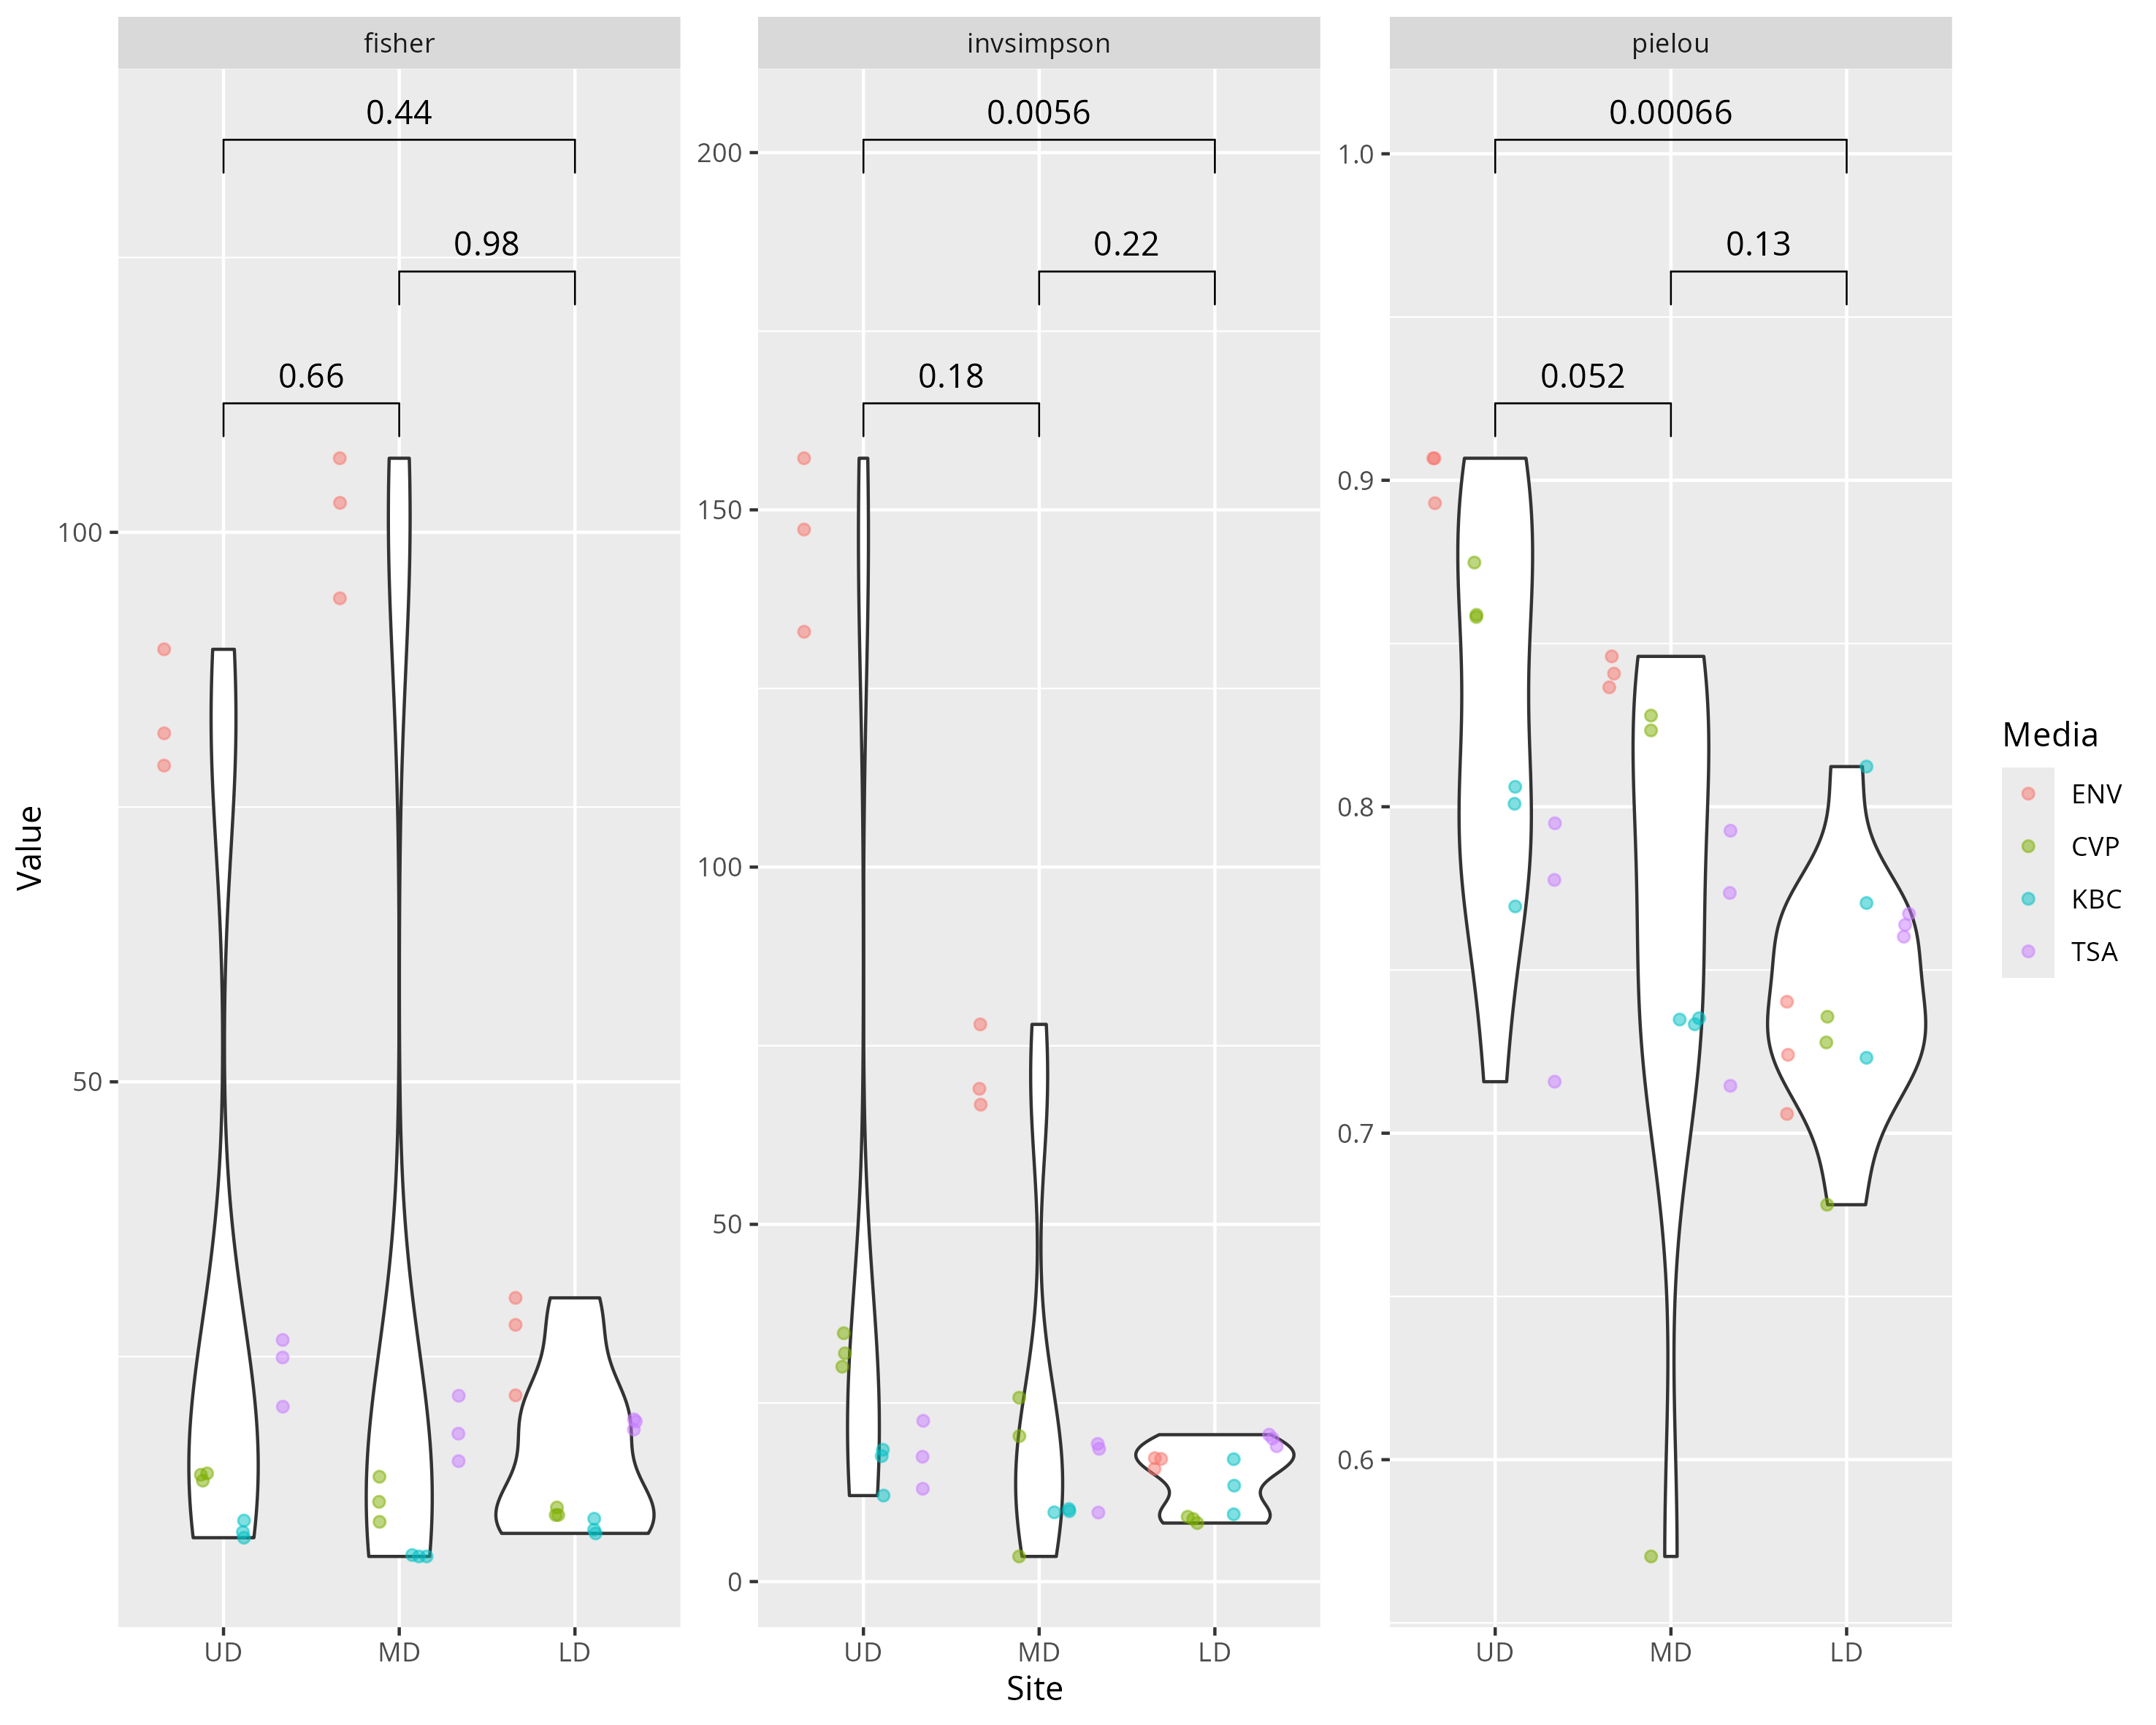

In [111]:
#Produce ggplot object of violin plot
alpha_violinplot <- ggplot(subset_alpha_metrics_long_df, aes(x = site, y = value)) +
                            ggplot2::geom_violin() +
                            ggforce::geom_sina(alpha=0.5, aes(colour=media)) +
                            ggplot2::labs(colour = "Media", x = "Site", y = "Value") +
                            ggplot2::facet_wrap(~metric, scales = "free") +
                            #Add comparisons
                            ggpubr::stat_compare_means(comparisons = my_ordered_comparisons)
#Save ggplot2 object with ggsave
ggsave(filename = "./Alpha_diversity_rarefy_iters_site_violinplot_pairwise_wilcox.png", plot = alpha_violinplot,
      device = "png", dpi = 300, units = "mm", height = 200, width = 250)
#Display plot
IRdisplay::display_png(file = "./Alpha_diversity_rarefy_iters_site_violinplot_pairwise_wilcox.png")